In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
df=pd.read_csv("Sales_with_NaNs_v1.3.csv")

In [35]:
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [36]:
df.shape

(10000, 7)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [38]:
df.tail()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
9995,Treatment,NaN,259.695935,415.181694,88.438776,98.418593,NaN
9996,Control,High Value,186.488285,216.225457,92.261537,100.000000,NaN
9997,Treatment,Low Value,208.107142,322.893351,55.915870,NaN,No
9998,Treatment,Medium Value,NaN,431.974901,66.082462,81.274030,No
9999,Control,Low Value,NaN,124.402398,55.692277,65.288480,Yes


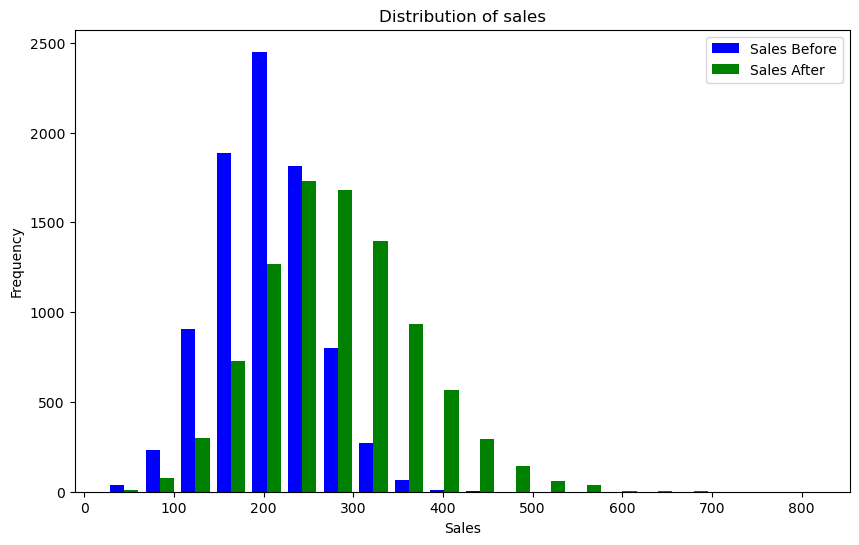

In [39]:
plt.figure(figsize=(10, 6))
plt.hist([df['Sales_Before'], df['Sales_After']], bins=20, color=['blue', 'green'], label=['Sales Before', 'Sales After'])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of sales')
plt.legend()
plt.show()

(array([6.700e+01, 6.500e+02, 2.192e+03, 3.186e+03, 1.764e+03, 5.140e+02,
        9.400e+01, 7.000e+00, 2.000e+00, 2.000e+00]),
 array([ 24.85296575,  76.90992389, 128.96688203, 181.02384017,
        233.08079831, 285.13775645, 337.19471458, 389.25167272,
        441.30863086, 493.365589  , 545.42254714]),
 <BarContainer object of 10 artists>)

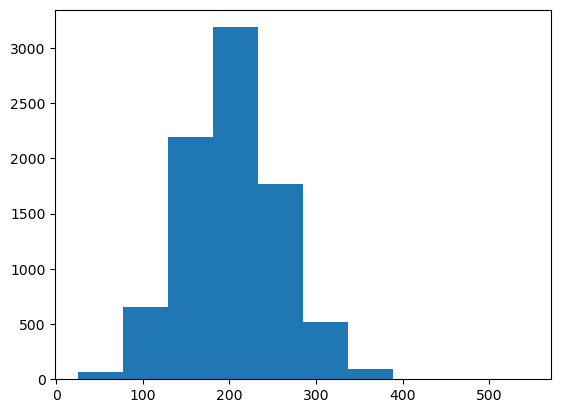

In [40]:
plt.hist(df['Sales_Before'])

(array([1.120e+02, 1.140e+03, 3.114e+03, 2.956e+03, 1.398e+03, 4.140e+02,
        8.600e+01, 9.000e+00, 3.000e+00, 1.000e+00]),
 array([ 32.41435228, 110.9949168 , 189.57548132, 268.15604584,
        346.73661036, 425.31717487, 503.89773939, 582.47830391,
        661.05886843, 739.63943295, 818.21999746]),
 <BarContainer object of 10 artists>)

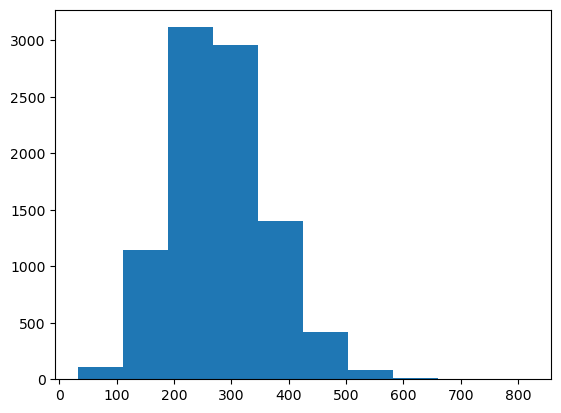

In [41]:
plt.hist(df['Sales_After'])

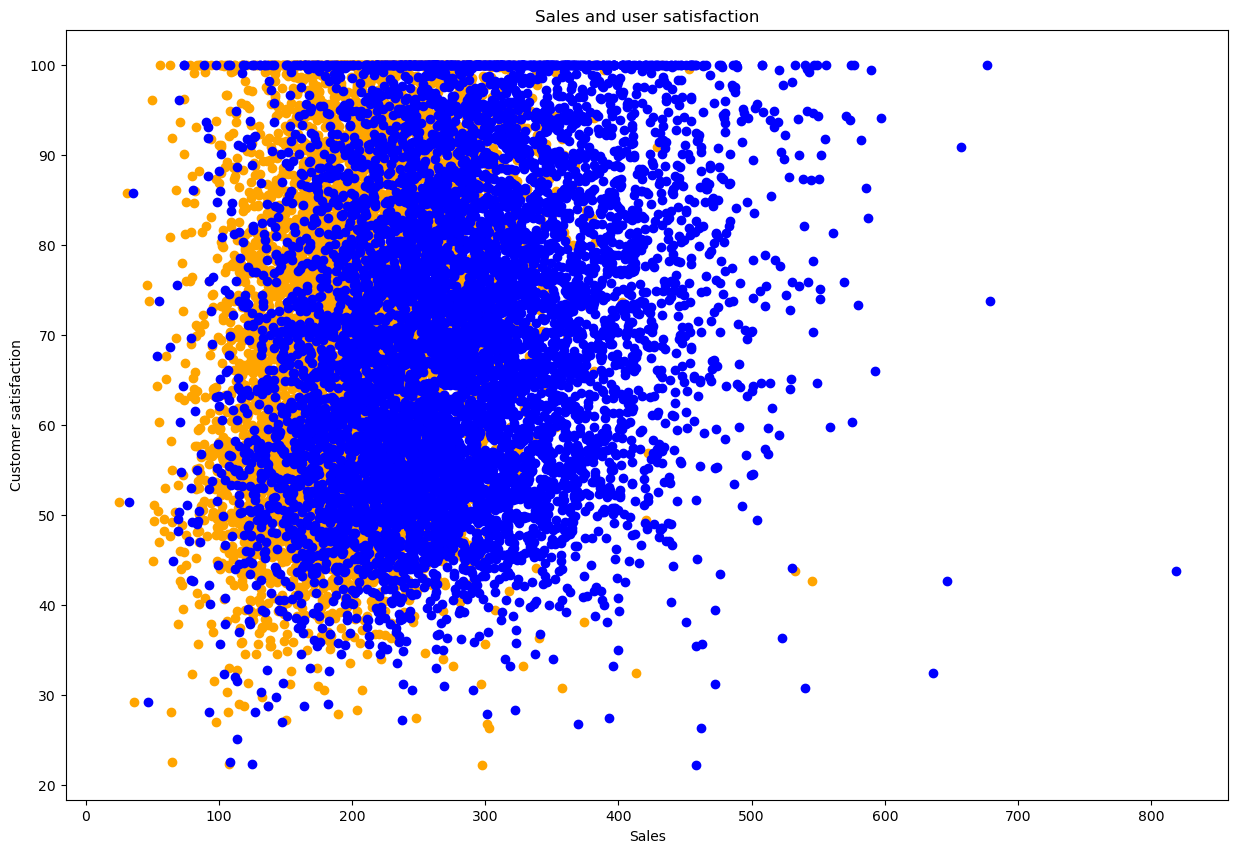

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(df['Sales_Before'],df['Customer_Satisfaction_Before'],color='orange',label='Before')
plt.scatter(df['Sales_After'],df['Customer_Satisfaction_Before'],color='blue',label='After')
plt.xlabel('Sales')
plt.ylabel('Customer satisfaction')
plt.title('Sales and user satisfaction')
plt.show()

In [43]:
df=df.dropna(subset=['Purchase_Made'])

In [44]:
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9993,Treatment,NaN,163.289805,248.916244,72.235869,91.898914,No
9994,NaN,Low Value,113.736701,177.749874,59.819753,NaN,Yes
9997,Treatment,Low Value,208.107142,322.893351,55.915870,NaN,No
9998,Treatment,Medium Value,NaN,431.974901,66.082462,81.274030,No


In [45]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [46]:
df['Customer_Satisfaction_After'].fillna(df['Customer_Satisfaction_After'].median(),inplace=True)
df['Customer_Satisfaction_Before'].fillna(df['Customer_Satisfaction_Before'].median(),inplace=True)
df['Sales_Before'].fillna(df['Sales_Before'].median(),inplace=True)
df['Sales_After'].fillna(df['Sales_After'].median(),inplace=True)

In [47]:
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,73.844594,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,273.179254,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9993,Treatment,NaN,163.289805,248.916244,72.235869,91.898914,No
9994,NaN,Low Value,113.736701,177.749874,59.819753,73.844594,Yes
9997,Treatment,Low Value,208.107142,322.893351,55.915870,73.844594,No
9998,Treatment,Medium Value,203.331012,431.974901,66.082462,81.274030,No


In [48]:
df.isnull().sum()

Group                           1287
Customer_Segment                1820
Sales_Before                       0
Sales_After                        0
Customer_Satisfaction_Before       0
Customer_Satisfaction_After        0
Purchase_Made                      0
dtype: int64

In [49]:
df['Customer_Segment'].fillna(df['Customer_Segment'].mode()[0],inplace=True)
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,73.844594,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,273.179254,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9993,Treatment,Medium Value,163.289805,248.916244,72.235869,91.898914,No
9994,NaN,Low Value,113.736701,177.749874,59.819753,73.844594,Yes
9997,Treatment,Low Value,208.107142,322.893351,55.915870,73.844594,No
9998,Treatment,Medium Value,203.331012,431.974901,66.082462,81.274030,No


In [50]:
df['Group'].fillna(df['Group'].mode()[0],inplace=True)
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,73.844594,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Treatment,High Value,229.685623,273.179254,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9993,Treatment,Medium Value,163.289805,248.916244,72.235869,91.898914,No
9994,Treatment,Low Value,113.736701,177.749874,59.819753,73.844594,Yes
9997,Treatment,Low Value,208.107142,322.893351,55.915870,73.844594,No
9998,Treatment,Medium Value,203.331012,431.974901,66.082462,81.274030,No


In [51]:
df.isnull().sum()

Group                           0
Customer_Segment                0
Sales_Before                    0
Sales_After                     0
Customer_Satisfaction_Before    0
Customer_Satisfaction_After     0
Purchase_Made                   0
dtype: int64

In [52]:
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,73.844594,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Treatment,High Value,229.685623,273.179254,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9993,Treatment,Medium Value,163.289805,248.916244,72.235869,91.898914,No
9994,Treatment,Low Value,113.736701,177.749874,59.819753,73.844594,Yes
9997,Treatment,Low Value,208.107142,322.893351,55.915870,73.844594,No
9998,Treatment,Medium Value,203.331012,431.974901,66.082462,81.274030,No


In [53]:
numerical_columns = ['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before','Customer_Satisfaction_After']
z_scores = stats.zscore(df[numerical_columns])
df_z_score = pd.DataFrame(z_scores, columns=numerical_columns)
outliers_z = (df_z_score.abs() > 3).any(axis=1)
outliers_df_z = df[outliers_z]
print("Outliers based on Z-score:")
print(outliers_df_z)

Outliers based on Z-score:
          Group Customer_Segment  Sales_Before  Sales_After  \
174   Treatment       High Value    203.331012   570.631494   
201   Treatment       High Value    366.275611   576.680026   
295   Treatment       High Value    343.745723   539.278803   
325   Treatment     Medium Value    337.800908   530.436574   
373   Treatment       High Value    203.331012   546.949307   
...         ...              ...           ...          ...   
9354  Treatment     Medium Value    351.938815   568.375935   
9374  Treatment       High Value    342.106921   539.948620   
9391    Control       High Value    360.677086   437.092664   
9694    Control       High Value    453.108063   541.257293   
9736  Treatment     Medium Value    342.615503   530.475231   

      Customer_Satisfaction_Before  Customer_Satisfaction_After Purchase_Made  
174                      94.352650                    73.844594           Yes  
201                     100.000000                   100

In [54]:
df['Customer_Segment']=encoder.fit_transform(df['Customer_Segment'])
df['Customer_Segment']

0       0
1       0
2       0
3       2
4       0
       ..
9993    2
9994    1
9997    1
9998    2
9999    1
Name: Customer_Segment, Length: 9195, dtype: int32

In [55]:
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,0,240.548359,300.007568,74.684767,73.844594,No
1,Treatment,0,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,0,156.978084,179.330464,98.780735,100.000000,No
3,Control,2,192.126708,229.278031,49.333766,39.811841,Yes
4,Treatment,0,229.685623,273.179254,83.974852,87.738591,Yes
...,...,...,...,...,...,...,...
9993,Treatment,2,163.289805,248.916244,72.235869,91.898914,No
9994,Treatment,1,113.736701,177.749874,59.819753,73.844594,Yes
9997,Treatment,1,208.107142,322.893351,55.915870,73.844594,No
9998,Treatment,2,203.331012,431.974901,66.082462,81.274030,No


In [56]:
df['Purchase_Made']=encoder.fit_transform(df['Purchase_Made'])
df['Purchase_Made']

0       0
1       1
2       0
3       1
4       1
       ..
9993    0
9994    1
9997    0
9998    0
9999    1
Name: Purchase_Made, Length: 9195, dtype: int32

In [57]:
df['Group']=encoder.fit_transform(df['Group'])
df['Group']

0       0
1       1
2       0
3       0
4       1
       ..
9993    1
9994    1
9997    1
9998    1
9999    0
Name: Group, Length: 9195, dtype: int32

In [58]:
df

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,0,0,240.548359,300.007568,74.684767,73.844594,0
1,1,0,246.862114,381.337555,100.000000,100.000000,1
2,0,0,156.978084,179.330464,98.780735,100.000000,0
3,0,2,192.126708,229.278031,49.333766,39.811841,1
4,1,0,229.685623,273.179254,83.974852,87.738591,1
...,...,...,...,...,...,...,...
9993,1,2,163.289805,248.916244,72.235869,91.898914,0
9994,1,1,113.736701,177.749874,59.819753,73.844594,1
9997,1,1,208.107142,322.893351,55.915870,73.844594,0
9998,1,2,203.331012,431.974901,66.082462,81.274030,0


In [138]:
df.describe()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
count,9195.000000,9195.000000,9.195000e+03,9.195000e+03,9.195000e+03,9.195000e+03,9195.000000
mean,0.570745,1.203589,3.446461e-16,8.654789e-17,3.863745e-16,-4.010567e-16,0.507558
std,0.494997,0.830991,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,0.499970
min,0.000000,0.000000,-3.521355e+00,-3.010634e+00,-3.097409e+00,-3.353633e+00,0.000000
25%,0.000000,0.000000,-5.897231e-01,-6.523597e-01,-7.299314e-01,-6.774395e-01,0.000000
50%,1.000000,1.000000,-3.915736e-03,-8.089014e-02,-3.952727e-02,-9.185558e-04,1.000000
75%,1.000000,2.000000,5.392015e-01,5.702303e-01,6.385148e-01,7.356143e-01,1.000000
max,1.000000,2.000000,6.738013e+00,6.551430e+00,1.927722e+00,1.575711e+00,1.000000


In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df[['Sales_Before','Sales_After','Customer_Satisfaction_Before','Customer_Satisfaction_After']]=scaler.fit_transform(df[['Sales_Before','Sales_After','Customer_Satisfaction_Before','Customer_Satisfaction_After']])

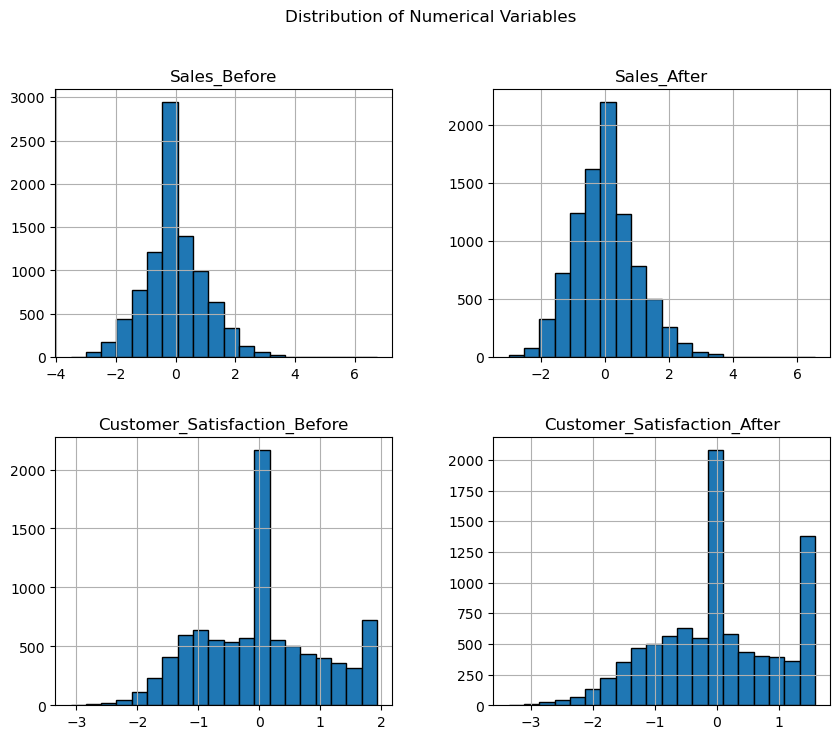

In [61]:
df[['Sales_Before', 'Sales_After','Customer_Satisfaction_Before','Customer_Satisfaction_After']].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Variables')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x=df.drop(columns='Customer_Satisfaction_After',axis=1)
y=df['Customer_Satisfaction_After']

In [64]:
x

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Purchase_Made
0,0,0,0.729562,0.245570,0.292550,0
1,1,0,0.853994,1.235233,1.927722,1
2,0,0,-0.917438,-1.222888,1.848966,0
3,0,2,-0.224730,-0.615102,-1.344932,1
4,1,0,0.515480,-0.080890,0.892619,1
...,...,...,...,...,...,...
9993,1,2,-0.793047,-0.376134,0.134370,0
9994,1,1,-1.769637,-1.242121,-0.667617,1
9997,1,1,0.090212,0.524055,-0.919778,0
9998,1,2,-0.003916,1.851412,-0.263094,0


In [65]:
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
model=LinearRegression()
model.fit(x_train,y_train)
training_data_prediction=model.predict(x_train)

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
y_pred=model.predict(x_test)
training_data_prediction=model.predict(x_train)

In [67]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):",mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
r2_test=metrics.r2_score(y_test,y_pred)
r2_train=metrics.r2_score(y_train,training_data_prediction)
print("R squred for the training data = ",r2_train*100)
print("R squared for the testing data = ",r2_test*100)

Mean Squared Error (MSE): 0.5490223682484621
Mean Absolute Error (MAE): 0.5761909474912622
R squred for the training data =  48.95034302571219
R squared for the testing data =  47.89486916508251


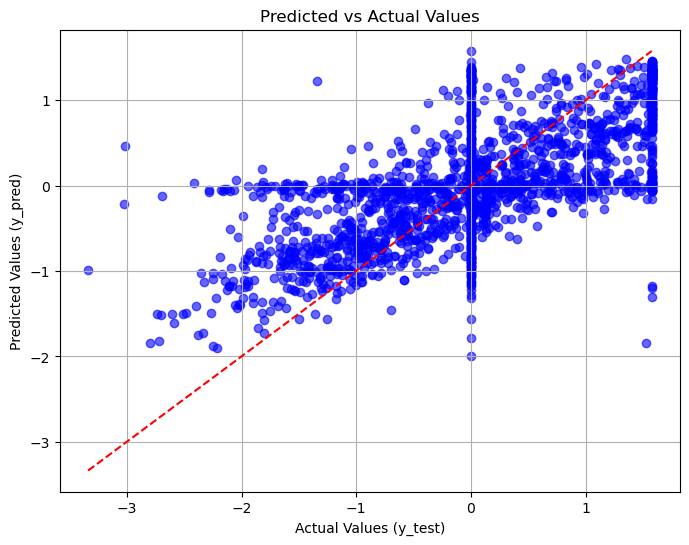

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid(True)
plt.show()


In [69]:
# KNN Regressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [128]:
nX_train, nX_test, ny_train, ny_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
nX_train = scaler.fit_transform(nX_train)
nX_test = scaler.transform(nX_test)
knn_reg = KNeighborsRegressor(n_neighbors=6)
knn_reg.fit(nX_train, ny_train)
ny_pred = knn_reg.predict(nX_test)

In [130]:
nmse = mean_squared_error(ny_test, ny_pred)
nr2 = r2_score(ny_test, ny_pred)
nmae = mean_absolute_error(ny_test, ny_pred)
print("Mean Absolute Error:", nmae)
print("Mean Squared Error:", nmse)
print("R² Score:", nr2*100)

Mean Absolute Error: 0.5752097048427997
Mean Squared Error: 0.5204102150538491
R² Score: 45.88204950547983


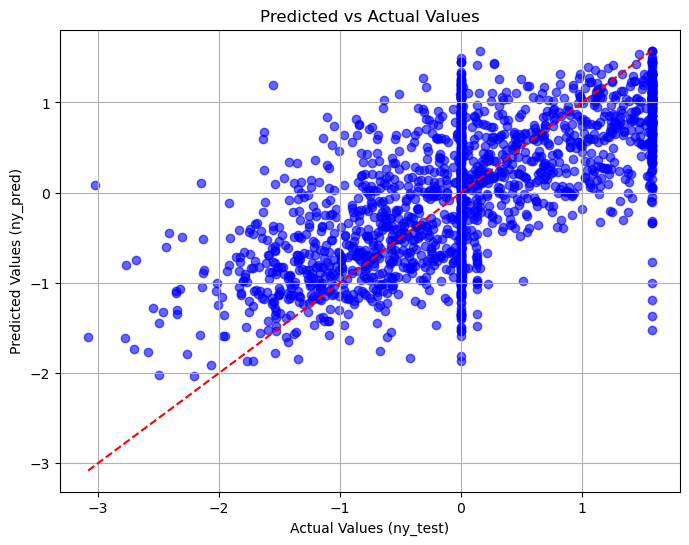

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(ny_test, ny_pred, color='blue', alpha=0.6)
plt.plot([min(ny_test), max(ny_test)], [min(ny_test), max(ny_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (ny_test)')
plt.ylabel('Predicted Values (ny_pred)')
plt.grid(True)
plt.show()


In [133]:
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN'],
    'R²': [r2_train, nr2],
    'MSE': [mse, nmse],
    'MAE': [mae, nmae]
})
model_comparison


,Model,R²,MSE,MAE
0,Linear Regression,0.489503,0.549022,0.576191
1,KNN,0.458820,0.520410,0.575210
